<a href="https://colab.research.google.com/github/KurbanAbdulaev04/Overview_of_ML/blob/main/%D0%94_%D0%A0_%D0%90%D0%B1%D0%B4%D1%83%D0%BB%D0%B0%D0%B5%D0%B2_%D0%9A%D1%83%D1%80%D0%B1%D0%B0%D0%BD(TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Реализация задачи классификации с использованием TensorFlow**


## Импорт необходимых модулей

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from datetime import datetime

## Загрузка и распаковка данных

In [ ]:
data = pd.read_csv('/content/SBER_210101_250101.csv')
print(data.shape)
print(data.sample(3))

data.info()

(999, 7)
     <DATE>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>     <VOL>
146  210730       0  302.42  306.67  301.12   305.59  49522680
529  230301       0  170.40  171.66  169.50   170.53  53655680
843  240527       0  321.08  321.95  315.50   317.09  45678990
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   <DATE>   999 non-null    int64  
 1   <TIME>   999 non-null    int64  
 2   <OPEN>   999 non-null    float64
 3   <HIGH>   999 non-null    float64
 4   <LOW>    999 non-null    float64
 5   <CLOSE>  999 non-null    float64
 6   <VOL>    999 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


## Преобразуем дату из типа int64 в datetime

In [ ]:
date = data['<DATE>']
day = [int(str(i)[4:]) for i in date]
month = [int(str(i)[2:4]) for i in date]
year = [int(str(i)[:2]) for i in date]
data['date'] = [datetime(int(f'20{year[i]}'), month[i], day[i])
                for i in range(len(year))]
data.info()
print(data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   <DATE>   999 non-null    int64         
 1   <TIME>   999 non-null    int64         
 2   <OPEN>   999 non-null    float64       
 3   <HIGH>   999 non-null    float64       
 4   <LOW>    999 non-null    float64       
 5   <CLOSE>  999 non-null    float64       
 6   <VOL>    999 non-null    int64         
 7   date     999 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 62.6 KB
   <DATE>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>      <VOL>       date
0  210104       0  274.67  276.60  270.61   272.00   48799460 2021-01-04
1  210105       0  272.67  275.70  270.28   275.20   45554100 2021-01-05
2  210106       0  275.90  275.92  271.62   272.93   40905340 2021-01-06
3  210108       0  275.11  283.99  275.11   283.64   88672940 2021-01-08
4  210111  

## Выбор данных для обучения, и разделим данные на обучающие и проверочные.

In [ ]:
close_data = data.filter(['<CLOSE>'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .9))
print(training)

900


## Применяем масштабирование и подготавливаем функции и метки x_train и y_train.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## LSTM используется, чтобы избежать проблемы с исчезающим градиентом, которая широко встречается при обучении RNN. Для объединения нескольких LSTM в TensorFlow обязательно использовать return_sequences = True .

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<bound method Model.summary of <Sequential name=sequential_1, built=True>>

## Составление и обучение модели
При составлении модели мы указываем эти три основных параметра:

* optimizer – Это метод, который помогает оптимизировать функцию затрат с помощью градиентного спуска.
* loss(потери) – Функция потерь, с помощью которой мы отслеживаем, улучшается ли модель с обучением или нет.
* metrics(метрики) – Это помогает оценить модель путем прогнозирования обучающих и валидационных данных.

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0131
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0105
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0100
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0089
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0090
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0094
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0094
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0084
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0087
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0064


## Создаем тетстовые данные

In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# прогнозирование тестировых данных
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# показатели оценки
mse = np.mean(((predictions - y_test) ** 2))
# среднеквадратическая ошибка
print("MSE", mse)
# среднеквадратичное отклонение
print("RMSE", np.sqrt(mse))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
MSE 88.66953935417963
RMSE 9.416450464701635


## Визиализируем результаты

<ipython-input-28-9e466b868965>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


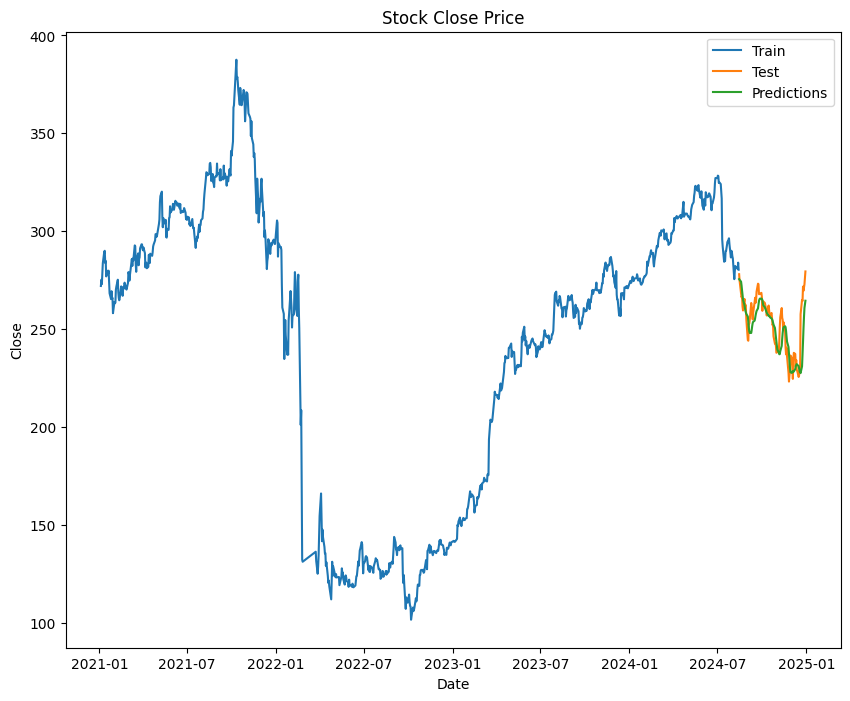

In [ ]:
train = data[:training]
test = data[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['<CLOSE>'])
plt.plot(test['date'], test[['<CLOSE>', 'Predictions']])
plt.title('Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])



Точность предсказаний, как видим на графике, довольно неплохая.

Можно ее улучшить, поэксперементировав с:
* разными предобученными моделями
* попробовав другие архитектуры
* добавить другие методы аугментации данных.